In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import calendar 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import Piyush 

In [15]:
d=pd.read_csv('./data/CTA_-_Ridership_-_Bus_Routes_-_Daily_Totals_by_Route.csv')
d

,route,date,daytype,rides
0,3,01/01/2001,U,7354
1,4,01/01/2001,U,9288
2,6,01/01/2001,U,6048
3,8,01/01/2001,U,6309
4,9,01/01/2001,U,11207
...,...,...,...,...
845350,X98,12/23/2019,W,1
845351,X98,12/26/2019,W,17
845352,X98,12/27/2019,W,18
845353,X98,12/28/2019,A,1


In [3]:
def findDay(dd): 
    daylist=[]
    yearlist=[]
    for date in dd:
        month, day, year = (int(i) for i in date.split('/'))  
        dayNumber = calendar.weekday(year, month, day) 
        days =["Monday", "Tuesday", "Wednesday", "Thursday", 
                             "Friday", "Saturday", "Sunday"] 
        daylist.append(days[dayNumber])
        yearlist.append(year)
    return daylist,yearlist
  

In [4]:
days,years= findDay(d['date'])

In [5]:
d['days']=days
d['year']=years
d

,route,date,daytype,rides,days,year
0,3,01/01/2001,U,7354,Monday,2001
1,4,01/01/2001,U,9288,Monday,2001
2,6,01/01/2001,U,6048,Monday,2001
3,8,01/01/2001,U,6309,Monday,2001
4,9,01/01/2001,U,11207,Monday,2001
...,...,...,...,...,...,...
845350,X98,12/23/2019,W,1,Monday,2019
845351,X98,12/26/2019,W,17,Thursday,2019
845352,X98,12/27/2019,W,18,Friday,2019
845353,X98,12/28/2019,A,1,Saturday,2019


In [6]:
uniroute=d.route.unique()
uniroute

array(['3', '4', '6', '8', '9', '10', '11', '12', '18', '20', '21', '22',
       '27', '28', '29', '30', '34', '35', '36', '43', '44', '47', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '60', '62', '63',
       '65', '66', '67', '68', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '84', '85', '87', '88', '90',
       '91', '92', '94', '97', '103', '106', '111', '112', '119', '126',
       '145', '146', '151', '152', '155', '171', '172', '173', '201',
       '49B', '52A', '53A', '54B', '63W', '81W', '8A', '95E', '95W',
       'X21', '1', '2', '7', '14', '17', '19', '24', '25', '33', '37',
       '39', '48', '59', '64', '69', '86', '93', '96', '100', '108',
       '120', '121', '122', '123', '125', '127', '129', '135', '136',
       '147', '156', '157', '169', '170', '202', '203', '204', '290S',
       '49A', '54A', '55N', '56A', '62H', '85A', '90N', 'X49', '137',
       '128', '124', '154', '130', '168', 'X80', 'X98', 'X55', '69BR',


In [7]:
route_group = d.groupby(['route']).count()
route_group


,date,daytype,rides,days,year
route,,,,,
1,4897,4897,4897,4897,4897
10,3519,3519,3519,3519,3519
100,4847,4847,4847,4847,4847
1001,2803,2803,2803,2803,2803
1002,15,15,15,15,15
...,...,...,...,...,...
X55,1924,1924,1924,1924,1924
X80,2545,2545,2545,2545,2545
X9,1957,1957,1957,1957,1957


In [8]:
dgrp=d.groupby(['route','daytype','days','year']).sum()
dgrp

rides
route daytype days      year       
1     A       Saturday  2015   2690
                        2016    443
      U       Friday    2015     10
              Sunday    2015   1172
              Thursday  2015      0
...                             ...
X99   W       Thursday  2005   1479
              Tuesday   2004  10695
                        2005   1165
              Wednesday 2004   9072
                        2005   1241

[23140 rows x 1 columns]

In [9]:
pd.set_option('display.max_rows', 1000)
newDF = pd.DataFrame()
notweek=[]
inweek=[]
# dgrp=dgrp.unstack()
dgrp=dgrp.reset_index()
for every in uniroute:
    dgrpr1=dgrp.loc[(dgrp['route']==every) & (dgrp['daytype']=='W')]
    size=dgrpr1.shape[0]
    
    if (size == 95):
        inweek.append(every)
        newDF=newDF.append(dgrpr1)
    else:
        notweek.append(every)
display(newDF)



,route,daytype,days,year,rides
8750,3,W,Friday,2001,1192023
8751,3,W,Friday,2002,1223390
8752,3,W,Friday,2003,1086186
8753,3,W,Friday,2004,1190087
8754,3,W,Friday,2005,1209754
...,...,...,...,...,...
19820,85A,W,Wednesday,2015,37646
19821,85A,W,Wednesday,2016,31656
19822,85A,W,Wednesday,2017,31926
19823,85A,W,Wednesday,2018,30758


Text(0.5, 1.0, 'Mean Bus ridership for weekdays from 2013 - 2019')

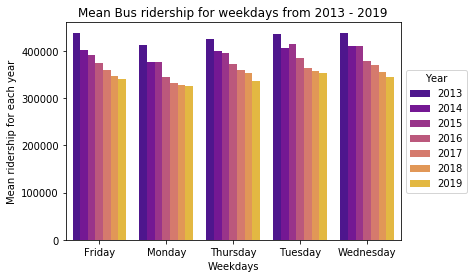

In [10]:
years=[2013,2014,2015,2016,2017,2018,2019]
nndf= newDF[newDF.year.isin(years)]
nndf.columns
nndf=nndf.groupby(['days','year']).mean()
nndf=nndf.reset_index()
nndf
y=sns.barplot(x="days",y="rides",hue="year",data=nndf,palette="plasma")
plt.legend(title='Year',loc='center left',bbox_to_anchor=(1,0.5))
plt.xlabel("Weekdays")
plt.ylabel("Mean ridership for each year")
plt.title("Mean Bus ridership for weekdays from 2013 - 2019")

In [11]:
ndf=newDF.groupby('route').transform(lambda x: (x - x.min()) / x.std())
ndf

,year,rides
8750,0.000000,3.411603
8751,0.181611,3.659491
8752,0.363221,2.575189
8753,0.544832,3.396303
8754,0.726443,3.551728
...,...,...
19820,2.542550,1.227615
19821,2.724161,0.481908
19822,2.905772,0.515521
19823,3.087382,0.370115


In [12]:
d1=pd.read_csv('CTA_-_Ridership_-_Bus_Routes_-_Daily_Totals_by_Route.csv')
data=Piyush.data_preparation(d1)

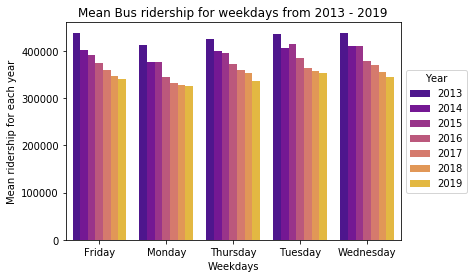

In [13]:
Piyush.createplot(data)